# 注文書分配プラン

In [22]:
%matplotlib inline
import pylab as pl
import numpy as np
pl.rcParams["font.family"] = "Yahei Mono"
pl.rcParams["font.size"] = 14

## Excelファイルからデータを読み込み

In [24]:
import pandas as pd
with pd.ExcelFile("data/注文書.xlsx") as xls_file:
    form = pd.read_excel(xls_file, 0)
    office = pd.read_excel(xls_file, 1)

### 注文

注文書リスト

In [25]:
form

,订单序号,总价
0,R2014061616-10,12970
1,R2014062429-6,17440
2,R2014062429-7,4960
3,R2014062429-8,200480
4,R2014060102-1,38220
5,R2014060102-3,25480
6,R2014060102-2,38220
7,R2014060102-6,13870
8,R2014060102-4,27740
9,R2014060102-5,41610


### 事務所

各個事務所担当すべき割合

In [26]:
office

,事务所,百分比
0,上海,0.233200
1,杭州,0.063377
2,嘉兴,0.017632
3,南京,0.056685
4,宁波,0.045448
5,浦东,0.089731
6,苏州,0.323872
7,温州,0.033206
8,无锡,0.058392
9,武汉,0.028642


## 棒グラフ

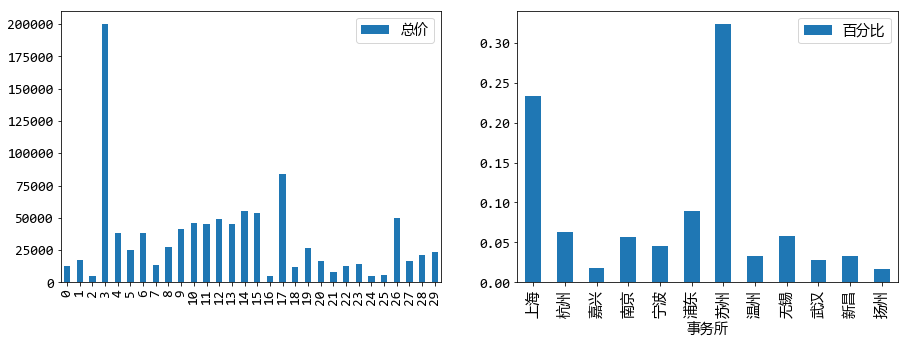

In [27]:
fig, axes = pl.subplots(1, 2, figsize=(15, 5))
form.plot(kind="bar", ax=axes[0])
office.set_index("事务所").plot(kind="bar", ax=axes[1]);

## OrTools

Googleで開発したいろんな最適化問題を解く為のソルバー

### コイン両替問題

ちょうど n 円のお釣りを払おうとしています。使用できるコインは何種類かあり、i 番目のコインの額面は value[i] で与えられます。
どのコインを何枚使っても構いません。支払うコインの組み合わせパタンを計算します。

In [28]:
from ortools.constraint_solver import pywrapcp
coins = [1, 2, 5, 10, 25, 50]
total = 33
n = len(coins)

solver = pywrapcp.Solver("coins")
x = [solver.IntVar(0, total) for i in range(n)]
solver.Add(total == solver.ScalProd(x, coins))

solution = solver.Assignment()
solution.Add(x)

db = solver.Phase(x, solver.CHOOSE_FIRST_UNBOUND, solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db)
while solver.NextSolution():
    print("x: ", [x[i].Value() for i in range(len(x))])
solver.EndSearch()

x:  [0, 4, 0, 0, 1, 0]
x:  [0, 4, 1, 2, 0, 0]
x:  [0, 4, 3, 1, 0, 0]
x:  [0, 4, 5, 0, 0, 0]
x:  [0, 9, 1, 1, 0, 0]
x:  [0, 9, 3, 0, 0, 0]
x:  [0, 14, 1, 0, 0, 0]
x:  [1, 1, 0, 3, 0, 0]
x:  [1, 1, 1, 0, 1, 0]
x:  [1, 1, 2, 2, 0, 0]
x:  [1, 1, 4, 1, 0, 0]
x:  [1, 1, 6, 0, 0, 0]
x:  [1, 6, 0, 2, 0, 0]
x:  [1, 6, 2, 1, 0, 0]
x:  [1, 6, 4, 0, 0, 0]
x:  [1, 11, 0, 1, 0, 0]
x:  [1, 11, 2, 0, 0, 0]
x:  [1, 16, 0, 0, 0, 0]
x:  [2, 3, 0, 0, 1, 0]
x:  [2, 3, 1, 2, 0, 0]
x:  [2, 3, 3, 1, 0, 0]
x:  [2, 3, 5, 0, 0, 0]
x:  [2, 8, 1, 1, 0, 0]
x:  [2, 8, 3, 0, 0, 0]
x:  [2, 13, 1, 0, 0, 0]
x:  [3, 0, 0, 3, 0, 0]
x:  [3, 0, 1, 0, 1, 0]
x:  [3, 0, 2, 2, 0, 0]
x:  [3, 0, 4, 1, 0, 0]
x:  [3, 0, 6, 0, 0, 0]
x:  [3, 5, 0, 2, 0, 0]
x:  [3, 5, 2, 1, 0, 0]
x:  [3, 5, 4, 0, 0, 0]
x:  [3, 10, 0, 1, 0, 0]
x:  [3, 10, 2, 0, 0, 0]
x:  [3, 15, 0, 0, 0, 0]
x:  [4, 2, 0, 0, 1, 0]
x:  [4, 2, 1, 2, 0, 0]
x:  [4, 2, 3, 1, 0, 0]
x:  [4, 2, 5, 0, 0, 0]
x:  [4, 7, 1, 1, 0, 0]
x:  [4, 7, 3, 0, 0, 0]
x:  [4, 12, 1, 0, 0, 0]
x:

### コイン枚数最少の解

In [29]:
coins = [1, 2, 5, 10, 25, 50]
total = 33
n = len(coins)

solver = pywrapcp.Solver("coins")
x = [solver.IntVar(0, total) for i in range(n)]
solver.Add(total == solver.ScalProd(x, coins))
total_count = solver.Sum(x)
objective = solver.Minimize(total_count, 1)

solution = solver.Assignment()
solution.Add(x)
solution.AddObjective(total_count)
db = solver.Phase(x, solver.CHOOSE_FIRST_UNBOUND, solver.ASSIGN_MIN_VALUE)
solver.NewSearch(db, [objective])
while solver.NextSolution():
    print("x: ", [x[i].Value() for i in range(len(x))])
solver.EndSearch()

x:  [0, 4, 0, 0, 1, 0]
x:  [1, 1, 1, 0, 1, 0]


## 注文書分配プラン 

In [30]:
def solve_plan(form, office):
    from ortools.constraint_solver import pywrapcp as cs
    import numpy as np

    projects = form[u"总价"].values.tolist()
    targets = office[u"百分比"].values

    total_price = sum(projects)

    target_prices = [int(x*total_price) for x in targets]

    solver = cs.Solver("works")

    variables_array = np.empty((len(projects), len(targets)), "O")

    for (i, j), _ in np.ndenumerate(variables_array):
        variables_array[i, j] = solver.IntVar([0, 1])

    variables_list = variables_array.ravel().tolist()

    for row in variables_array:
        solver.Add(solver.Sum(row.tolist()) == 1)

    differents = []
    for i, col in enumerate(variables_array.T):
        col = col.tolist()
        total = solver.ScalProd(col, projects)
        differents.append(solver.Max(total - target_prices[i], target_prices[i] - total))

        solver.Add(total < int(targets[i] * 1.1 * total_price))
        solver.Add(total > int(targets[i] * 0.9 * total_price))

    total_differents = solver.Sum(differents)
    #solver.Add( total_differents < 30000)
    limit = solver.TimeLimit(5000)
    objective = solver.Minimize(total_differents, 1)

    solution = solver.Assignment()
    solution.Add(variables_list)
    solution.AddObjective(total_differents)
    collector = solver.LastSolutionCollector(solution)
    solver.Solve(solver.Phase(variables_list + [total_differents],
                            solver.INT_VAR_DEFAULT,
                            solver.INT_VALUE_DEFAULT),
               [collector, objective, limit])
    res = np.array([collector.Value(0, v) for v in variables_list]).reshape(len(projects), -1)

    plan = np.dot(projects, res)

    df = pd.DataFrame({"idea":target_prices, "plan":plan})
    df.index = office[u"事务所"]
    form2 = form.copy()
    form2[u"事务所"] = df.index[np.argmax(res, axis=1)]
    
    fig, axes = pl.subplots(figsize=(12, 5))
    res = form2.groupby(u"事务所").apply(lambda df:df.reset_index()).unstack(1)[u"总价"].reindex(df.index)
    res.plot(kind="bar", stacked=True, legend=False, width=0.4, position=-0.5, ax=axes)
    df[["idea"]].plot(kind="bar", ax=axes, width=0.4, color="gray", legend=False)    
    return form2

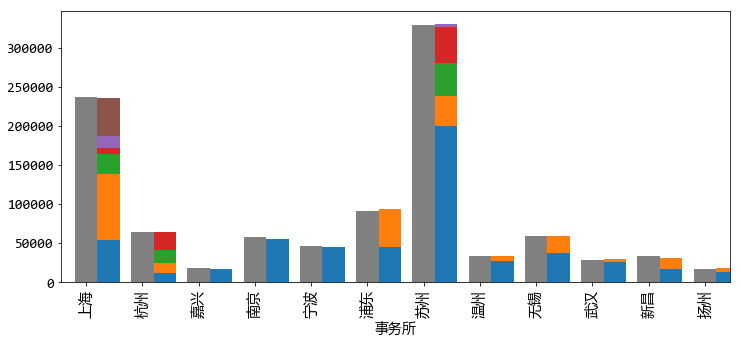

In [31]:
form2 = solve_plan(form, office)

In [32]:
form2

,订单序号,总价,事务所
0,R2014061616-10,12970,扬州
1,R2014062429-6,17440,新昌
2,R2014062429-7,4960,扬州
3,R2014062429-8,200480,苏州
4,R2014060102-1,38220,无锡
5,R2014060102-3,25480,武汉
6,R2014060102-2,38220,苏州
7,R2014060102-6,13870,新昌
8,R2014060102-4,27740,温州
9,R2014060102-5,41610,苏州
